In [1]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO


image 1/1 /home/jovyan/test model/day_00059.jpg: 640x640 1 license_plate, 6.3ms
Speed: 2.3ms preprocess, 6.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Saved cropped plate: cropped_plate_1.jpg


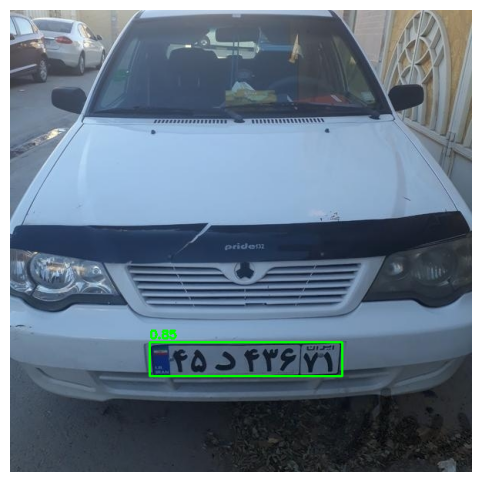

In [ ]:
model = YOLO("../model/best_plate_detection.pt")

image_path = "test.jpg"  
image = cv2.imread(image_path)

results = model(image_path)

crop_count = 1

for result in results:
    for box in result.boxes:
        x_min, y_min, x_max, y_max = map(int, box.xyxy[0]) 
        confidence = box.conf[0].item() 
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
        cv2.putText(image, f"{confidence:.2f}", (x_min, y_min - 5), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        cropped_plate = image[y_min:y_max, x_min:x_max]

        crop_path = f"cropped_plate_{crop_count}.jpg"
        cv2.imwrite(crop_path, cropped_plate)
        print(f"Saved cropped plate: {crop_path}")
        
        crop_count += 1  
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis("off")
plt.show()